In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


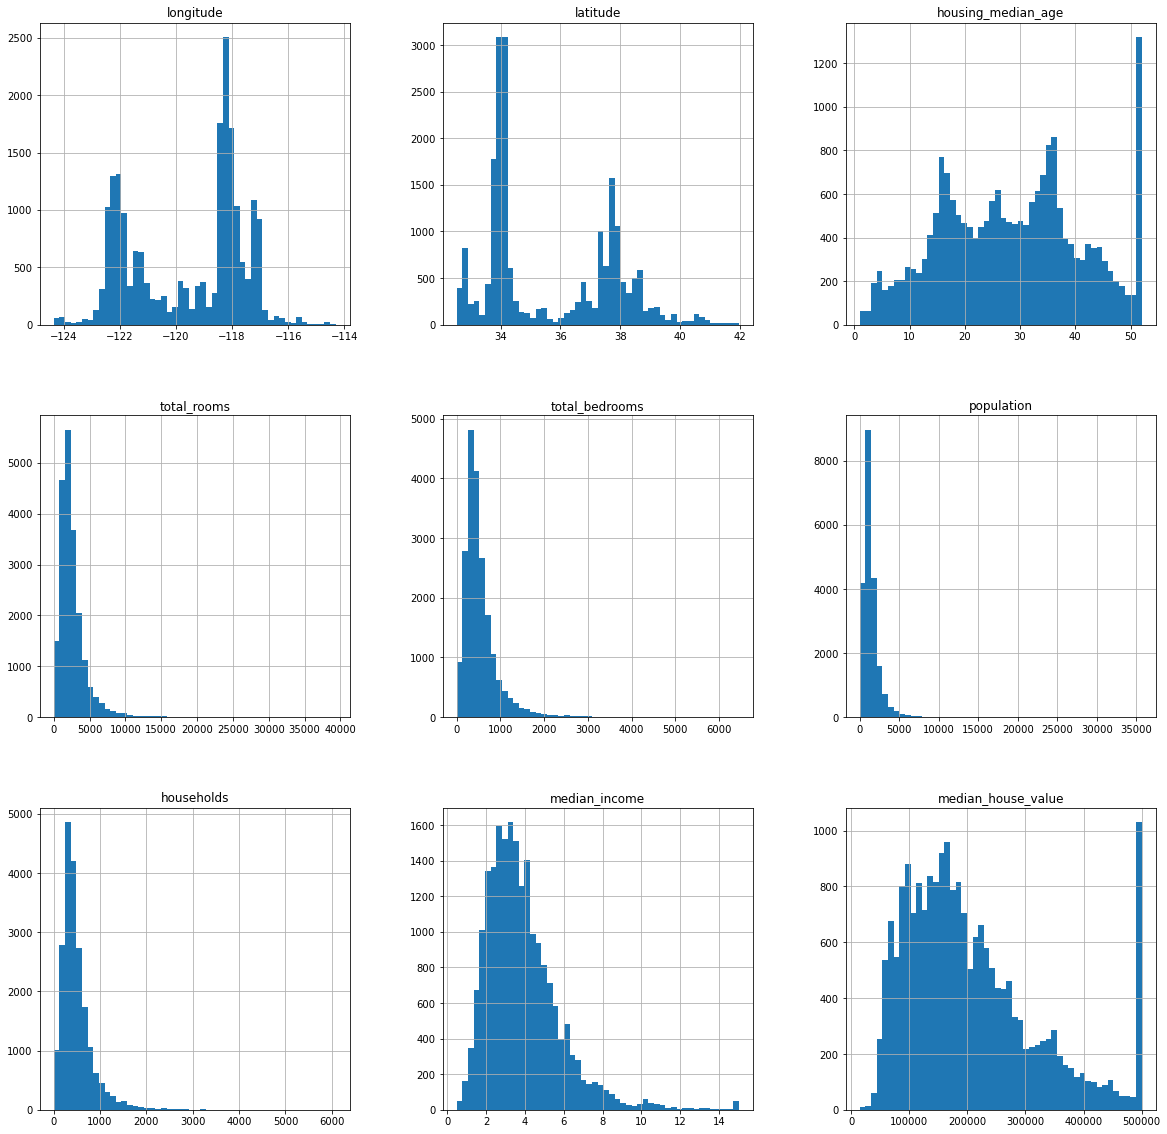

In [31]:
%matplotlib inline
v=20
m=20
housing.hist(bins=50,figsize=(m,v))
plt.show()

In [34]:
def split_train_test(data,split_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size=int(len(data) * split_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [35]:
train_set,test_set = split_train_test(housing,0.2)

In [53]:
print("train set :{}".format(len(train_set)))
print("test set:{}".format(len(test_set)))
train_set.head()

train set :16512
test set:4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16058,-122.49,37.76,52.0,1792.0,305.0,782.0,287.0,4.0391,332700.0,NEAR BAY
943,-122.01,37.53,19.0,4572.0,712.0,2346.0,709.0,6.0667,245700.0,NEAR BAY
3964,-118.58,34.20,21.0,2979.0,744.0,1824.0,692.0,3.5000,223700.0,<1H OCEAN
6389,-118.03,34.16,39.0,2731.0,366.0,1034.0,338.0,9.8098,500001.0,INLAND
13178,-117.72,33.99,14.0,5622.0,861.0,3108.0,821.0,5.7763,206700.0,INLAND


In [74]:
def train_test_split(data,ratio,z):
    shuffled_data= np.random.permutation(len(data))
    test_size= int(len(shuffled_data ) * ratio)
    test_indice= shuffled_data[:test_size]
    train_indice=shuffled_data[test_size:]
    return data.iloc[train_indice],data.iloc[test_indice],shuffled_data

train_set,test_set=train_test_split(housing,0.2)

TypeError: train_test_split() missing 1 required positional argument: 'z'

In [83]:
x,y,z=train_test_split(housing,0.2,housing)
 

In [87]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

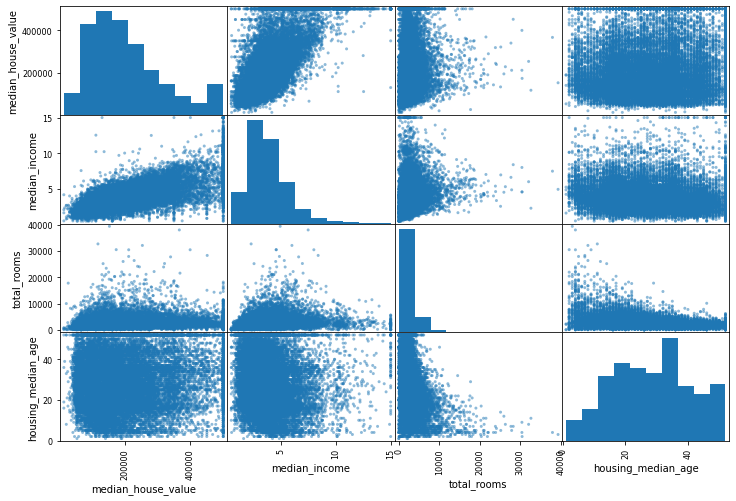

In [91]:
%matplotlib inline
attributes= ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

In [92]:
def train_test_split(data,ratio):
    shuffled_data=np.random.permutation(len(data))
    test_data_size=int(len(shuffled_data) * ratio)
    test_data = data.iloc[:test_data_size]
    train_data= data.iloc[test_data_size:]
    return train_data,test_data

In [95]:
train_x,test_x= train_test_split(housing,0.2)
print("train_x size is {}".format(len(train_x)))
print("test_x size is {}".format(len(test_x)))

train_x size is 16512
test_x size is 4128


array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>]], dtype=object)

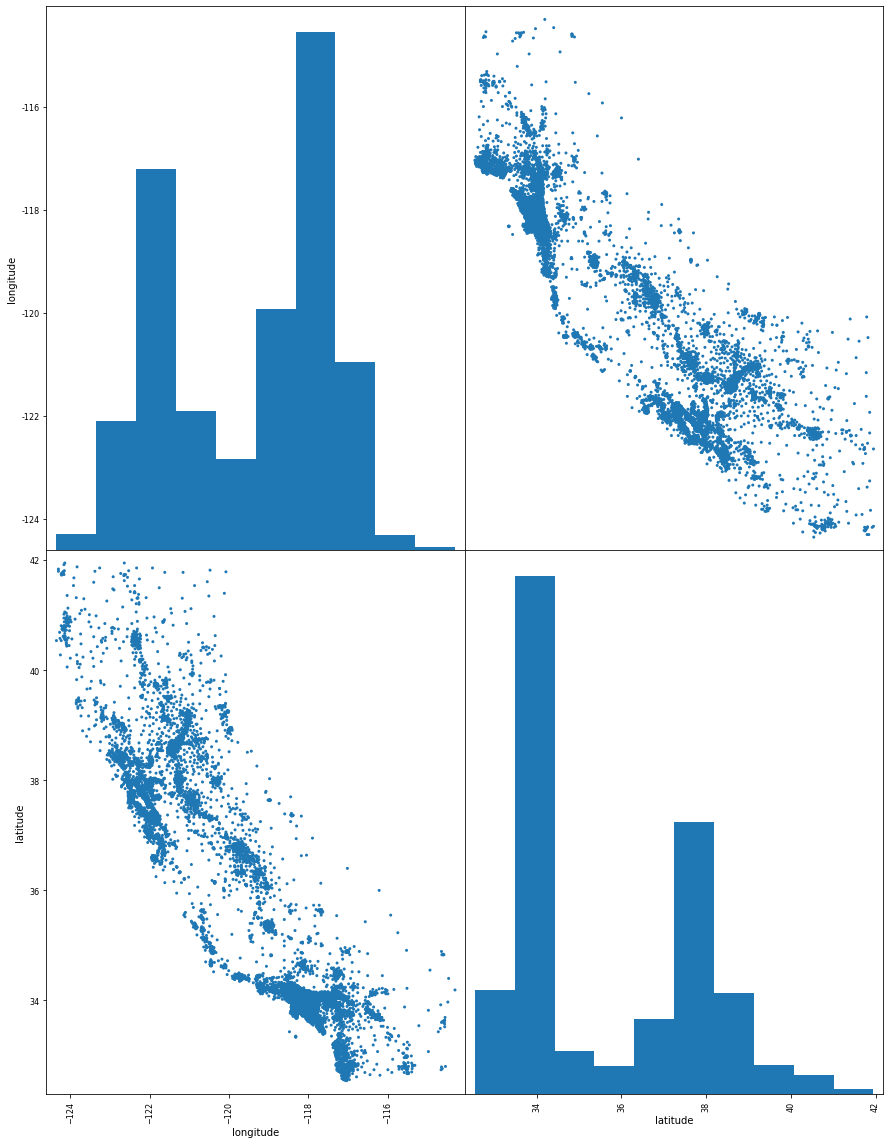

In [115]:
from pandas.plotting import scatter_matrix
attribute = ["longitude","latitude"]
scatter_matrix(housing[attribute],figsize=(15,20),alpha=1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

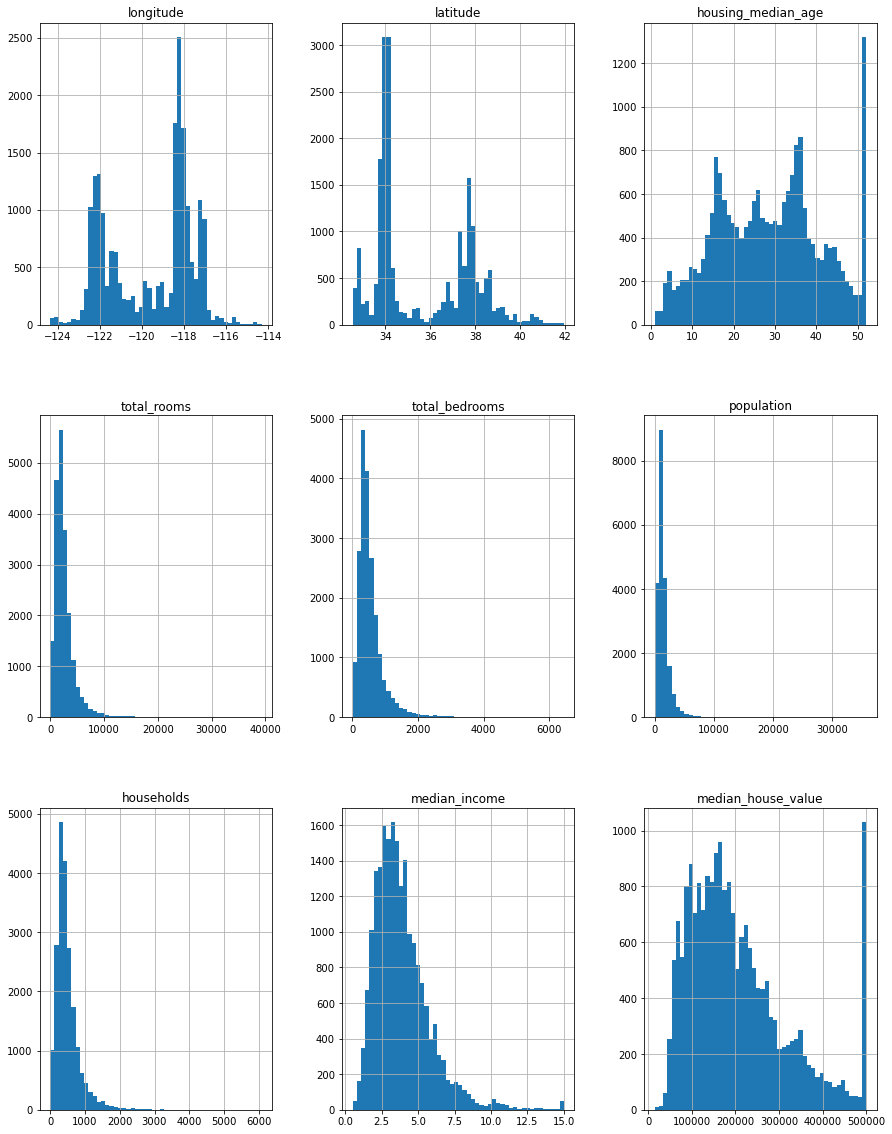

In [118]:
housing.hist(bins=50,figsize=(15,20))